# QT Analysis: Participant 1

In [29]:
# Load packages
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import (train_test_split, GridSearchCV, cross_val_score)
from sklearn.metrics import (classification_report, ConfusionMatrixDisplay)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

## Data preparation with session 4 as a test set

In [11]:
# Create empty lists to store the data
sad_data13 = []
anger_data13 = []
fear_data13 = []
neutral_data13 = []

# Add the data together
for x in range(1, 4):
    df_sad13 = pd.read_csv("Data/Session{}/1/sad.csv".format(x))
    df_anger13 = pd.read_csv("Data/Session{}/1/anger.csv".format(x))
    df_fear13 = pd.read_csv("Data/Session{}/1/fear.csv".format(x))
    sad_data13.append(df_sad13)
    anger_data13.append(df_anger13)
    fear_data13.append(df_fear13)
    if x == 3:
        df_neutral13 = pd.read_csv("Data/Session{}/1/neutral.csv".format(x))
        neutral_data13.append(df_neutral13)
        
# Create empty lists for session to store the data for test set
sad_data4 = []
anger_data4 = []
fear_data4 = []
neutral_data4 = []

df_sad4 = pd.read_csv("Data/Session4/1/sad.csv")
df_anger4 = pd.read_csv("Data/Session4/1/anger.csv")
df_fear4 = pd.read_csv("Data/Session4/1/fear.csv")
df_neutral4 = pd.read_csv("Data/Session4/1/neutral.csv")
sad_data4.append(df_sad4)
anger_data4.append(df_anger4)
fear_data4.append(df_fear4)
neutral_data4.append(df_neutral4)

In [12]:
# Encode labels
for x in sad_data13:
    x.iloc[:, 0] = 0
    
for x in anger_data13:
    x.iloc[:, 0] = 1
    
for x in fear_data13:
    x.iloc[:, 0] = 2
    
for x in neutral_data13:
    x.iloc[:, 0] = 3
    
    # Encode labels
for x in sad_data4:
    x.iloc[:, 0] = 0
    
for x in anger_data4:
    x.iloc[:, 0] = 1
    
for x in fear_data4:
    x.iloc[:, 0] = 2
    
for x in neutral_data4:
    x.iloc[:, 0] = 3

In [13]:
# Copy the neutral data so that it will be equal to the other classes
combined_data13 = sad_data13 + anger_data13 + fear_data13 + neutral_data13
all_data13 = []

for x in combined_data13:
    for y in range(len(x.values)):
        all_data13.append(x.values[y])
        
# Copy the neutral data so that it will be equal to the other classes
combined_data4 = sad_data4 + anger_data4 + fear_data4 + neutral_data4
all_data4 = []

for x in combined_data4:
    for y in range(len(x.values)):
        all_data4.append(x.values[y])

In [14]:
# Shuffle data
random.seed(42)
random.shuffle(all_data13)
random.shuffle(all_data4)

In [15]:
y_train = []
X_train = []
for data in all_data13:
    # Extract labels and append to y
    label = data[0]
    y_train.append(label)
    # Extract feature points and append to X
    data2 = data[1:]
    # Normalize data between 0 and 1
    normalized = (data2 - np.min(data2)) / (np.max(data2) - np.min(data2))
    X_train.append(normalized)
    
y_test = []
X_test = []
for data in all_data4:
    # Extract labels and append to y
    label = data[0]
    y_test.append(label)
    # Extract feature points and append to X
    data2 = data[1:]
    # Normalize data between 0 and 1
    normalized = (data2 - np.min(data2)) / (np.max(data2) - np.min(data2))
    X_test.append(normalized)

In [16]:
# Make sure all values in the arrays are float to prevent future warnings
X_train = [np.array(x, dtype=float) for x in X_train]
X_test = [np.array(x, dtype=float) for x in X_test]

In [20]:
# Use smote to fix imbalances
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

C:\Users\selma\anaconda3\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [21]:
# Check if each class is equally represented in y_train
count0 = 0
count1 = 0
count2 = 0
count3 = 0

for x in y_test:
    if x == 0:
        count0 += 1
    elif x == 1:
        count1 += 1
    elif x == 2:
        count2 += 1
    elif x == 3:
        count3 += 1

print(f"Label 0: {count0}")
print(f"Label 1: {count1}")
print(f"Label 2: {count2}")
print(f"Label 3: {count3}")

Label 0: 99
Label 1: 99
Label 2: 99
Label 3: 99


## Train models with session 4 as test set

### Logistic Regression

In [34]:
param_grid = {"solver": ["lbfgs", "liblinear", "newton-cg"]}

lr = LogisticRegression(random_state=42, max_iter=5000)
grid_search_lr = GridSearchCV(lr, param_grid, cv=5, n_jobs=-1)
grid_search_lr.fit(X_train, y_train)
print(grid_search_lr.best_params_)

{'solver': 'newton-cg'}


In [35]:
lr = LogisticRegression(random_state=42, max_iter=5000, solver="newton-cg")
cv_scores = cross_val_score(lr, X_train, y_train, cv=3)
lr = lr.fit(X_train, y_train)

print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", np.mean(cv_scores))
print("Test set accuracy:", lr.score(X_test, y_test))

y_pred = lr.predict(X_test).astype(int)

target_names = ["sad", "anger", "fear", "neutral"]
print(classification_report(y_test, y_pred, target_names=target_names, zero_division = 0))

Cross-validation scores: [0.91414141 0.90151515 0.8989899 ]
Mean accuracy: 0.9048821548821548
Test set accuracy: 0.351010101010101
              precision    recall  f1-score   support

         sad       0.00      0.00      0.00        99
       anger       1.00      0.31      0.48        99
        fear       0.60      0.09      0.16        99
     neutral       0.28      1.00      0.44        99

    accuracy                           0.35       396
   macro avg       0.47      0.35      0.27       396
weighted avg       0.47      0.35      0.27       396



Confusion matrix, without normalization
[[ 0  0  0 99]
 [ 0 31  6 62]
 [ 0  0  9 90]
 [ 0  0  0 99]]
Normalized confusion matrix
[[0.         0.         0.         1.        ]
 [0.         0.31313131 0.06060606 0.62626263]
 [0.         0.         0.09090909 0.90909091]
 [0.         0.         0.         1.        ]]


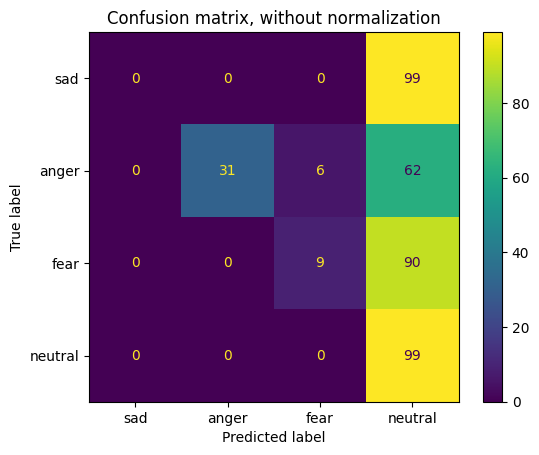

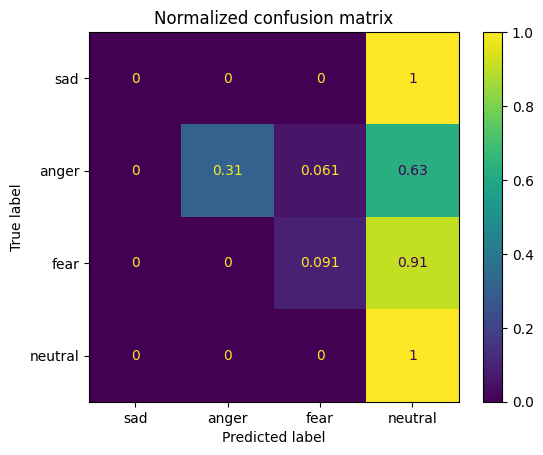

In [36]:
# Plot normalized and non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None), ("Normalized confusion matrix", "true")]

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        lr,
        X_test,
        y_test,
        display_labels=target_names,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

### Random Forest

In [22]:
param_grid = {"n_estimators": [50, 100, 200, 300] }

rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
print(grid_search_rf.best_params_)

{'n_estimators': 100}


In [26]:
# Random Forest
rf = RandomForestClassifier(random_state=42, n_estimators=100)
cv_scores = cross_val_score(rf, X_train, y_train, cv=5)
rf = rf.fit(X_train, y_train)

print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", np.mean(cv_scores))
print("Test set accuracy:", rf.score(X_test, y_test))

y_pred = rf.predict(X_test).astype(int)

target_names = ["sad", "anger", "fear", "neutral"]
print(classification_report(y_test, y_pred, target_names=target_names, zero_division = 0))

Cross-validation scores: [0.97478992 0.99159664 0.98319328 0.98734177 0.97468354]
Mean accuracy: 0.9823210296776939
Test set accuracy: 0.5404040404040404
              precision    recall  f1-score   support

         sad       0.00      0.00      0.00        99
       anger       1.00      0.40      0.58        99
        fear       0.59      0.83      0.69        99
     neutral       0.42      0.93      0.58        99

    accuracy                           0.54       396
   macro avg       0.50      0.54      0.46       396
weighted avg       0.50      0.54      0.46       396



Confusion matrix, without normalization
[[ 0  0  8 91]
 [ 0 40 42 17]
 [ 0  0 82 17]
 [ 0  0  7 92]]
Normalized confusion matrix
[[0.         0.         0.08080808 0.91919192]
 [0.         0.4040404  0.42424242 0.17171717]
 [0.         0.         0.82828283 0.17171717]
 [0.         0.         0.07070707 0.92929293]]


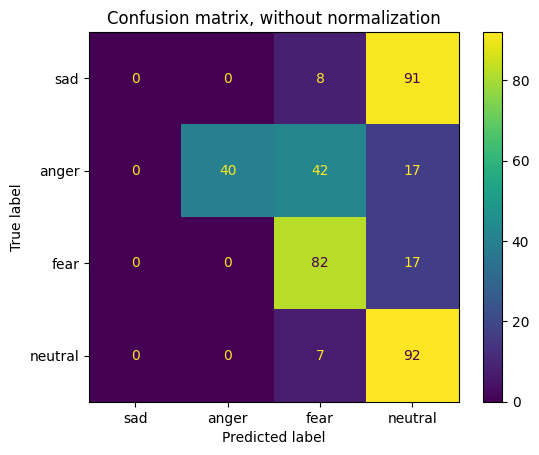

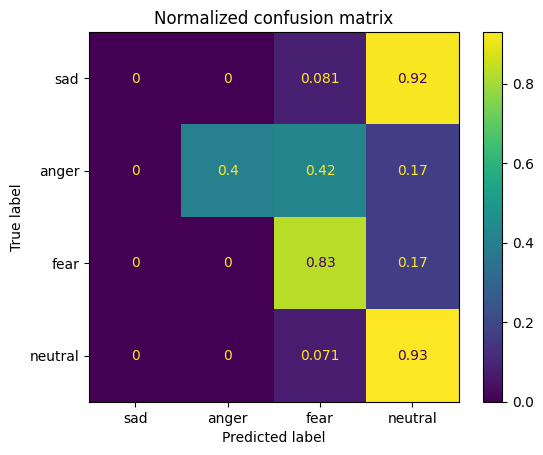

In [28]:
# Plot normalized and non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None), ("Normalized confusion matrix", "true")]

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        rf,
        X_test,
        y_test,
        display_labels=target_names,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

### Multi-layer perceptron 

In [67]:
param_grid = {"hidden_layer_sizes": [(5,2)],
              "alpha": [0.0001, 0.001, 0.01],
              "learning_rate": ["constant", "adaptive"]}

mlp = MLPClassifier(random_state=42, max_iter=500000)
grid_search_mlp = GridSearchCV(mlp, param_grid, cv=5, n_jobs=-1)
grid_search_mlp.fit(X_train, y_train)
print(grid_search_mlp.best_params_)

{'alpha': 0.001, 'hidden_layer_sizes': (5, 2), 'learning_rate': 'constant'}


In [100]:
# Multi-layer perceptron 
mlp = MLPClassifier(random_state=42, solver="lbfgs", alpha=0.001, hidden_layer_sizes=(5,2), max_iter=50000)
cv_scores = cross_val_score(mlp, X_train, y_train, cv=5)
mlp = mlp.fit(X_train, y_train)

print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", np.mean(cv_scores))
print("Test set accuracy:", mlp.score(X_test, y_test))

y_pred = mlp.predict(X_test).astype(int)

target_names = ["sad", "anger", "fear", "neutral"]
print(classification_report(y_test, y_pred, target_names=target_names, zero_division = 0))

Cross-validation scores: [0.95378151 0.93697479 0.96638655 0.8649789  0.91139241]
Mean accuracy: 0.9267028330319469
Test set accuracy: 0.25
              precision    recall  f1-score   support

         sad       0.00      0.00      0.00        99
       anger       0.00      0.00      0.00        99
        fear       0.00      0.00      0.00        99
     neutral       0.31      1.00      0.47        99

    accuracy                           0.25       396
   macro avg       0.08      0.25      0.12       396
weighted avg       0.08      0.25      0.12       396



Confusion matrix, without normalization
[[ 0  0 21 78]
 [ 0  0 42 57]
 [ 5  4  0 90]
 [ 0  0  0 99]]
Normalized confusion matrix
[[0.         0.         0.21212121 0.78787879]
 [0.         0.         0.42424242 0.57575758]
 [0.05050505 0.04040404 0.         0.90909091]
 [0.         0.         0.         1.        ]]


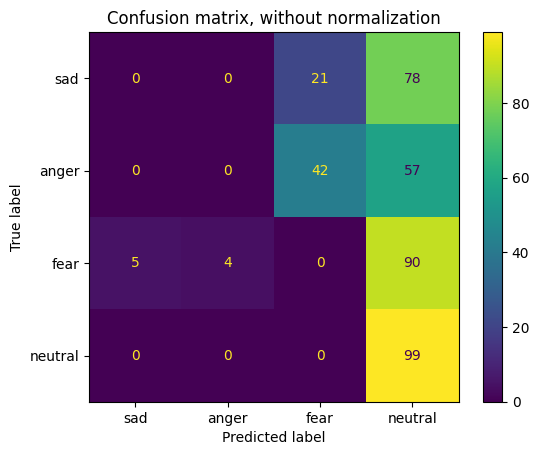

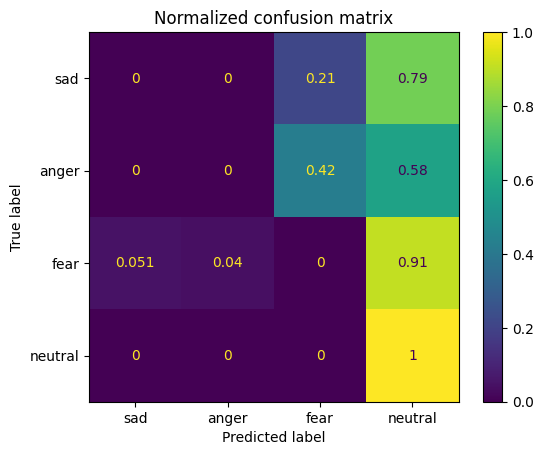

In [101]:
# Plot normalized and non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None), ("Normalized confusion matrix", "true")]

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        mlp,
        X_test,
        y_test,
        display_labels=target_names,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

### Support Vector Machine

In [200]:
param_grid = {"svc__C": [0.1, 1, 10],
              "svc__kernel": ["linear", "rbf"],
              "svc__gamma": ["scale", "auto"]}

svm = make_pipeline(StandardScaler(), SVC(random_state=42))
grid_search_svm = GridSearchCV(svm, param_grid, cv=5, n_jobs=-1)
grid_search_svm.fit(X_train, y_train)
print(grid_search_svm.best_params_)

{'svc__C': 10, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}


In [201]:
# Support Vector Machine
svm = make_pipeline(StandardScaler(), SVC(random_state=42, gamma="scale", C=10, kernel="rbf"))
cv_scores = cross_val_score(svm, X_train, y_train, cv=5)
svm = svm.fit(X_train, y_train)

print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", np.mean(cv_scores))
print("Test set accuracy:", svm.score(X_test, y_test))

y_pred = svm.predict(X_test).astype(int)

target_names = ["sad", "anger", "fear", "neutral"]
print(classification_report(y_test, y_pred, target_names=target_names, zero_division = 0))

Cross-validation scores: [0.98739496 0.99579832 0.99579832 1.         0.99156118]
Mean accuracy: 0.9941105556146509
Test set accuracy: 0.5757575757575758
              precision    recall  f1-score   support

         sad       0.00      0.00      0.00        99
       anger       0.60      0.45      0.52        99
        fear       0.42      0.85      0.56        99
     neutral       0.82      1.00      0.90        99

    accuracy                           0.58       396
   macro avg       0.46      0.58      0.50       396
weighted avg       0.46      0.58      0.50       396



Confusion matrix, without normalization
[[ 0 29 67  3]
 [ 0 45 49  5]
 [ 1  1 84 13]
 [ 0  0  0 99]]
Normalized confusion matrix
[[0.         0.29292929 0.67676768 0.03030303]
 [0.         0.45454545 0.49494949 0.05050505]
 [0.01010101 0.01010101 0.84848485 0.13131313]
 [0.         0.         0.         1.        ]]


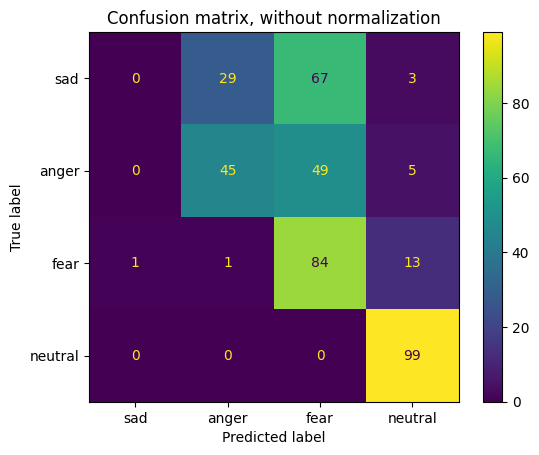

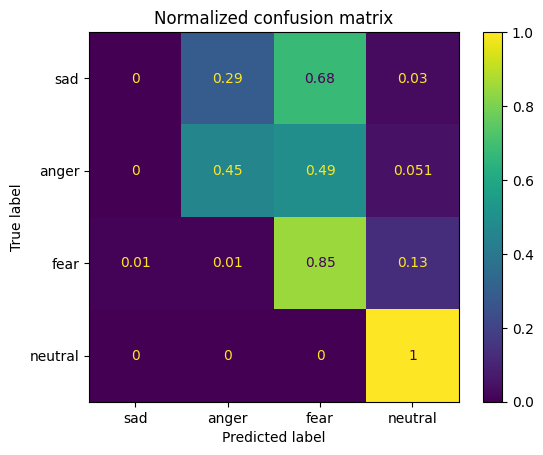

In [104]:
# Plot normalized and non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),("Normalized confusion matrix", "true")]

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        svm,
        X_test,
        y_test,
        display_labels=target_names,
        normalize=normalize,
    )
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)

### K-nearest neighbors

In [30]:
param_grid = {"n_neighbors": [1, 2, 3, 4, 5]}

knn = KNeighborsClassifier()
grid_search_lr = GridSearchCV(knn, param_grid, cv=5, n_jobs=-1)
grid_search_lr.fit(X_train, y_train)
print(grid_search_lr.best_params_)

{'n_neighbors': 1}


In [32]:
knn = KNeighborsClassifier(n_neighbors=1)
cv_scores = cross_val_score(knn, X_train, y_train, cv=5)
knn = knn.fit(X_train, y_train)

print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", np.mean(cv_scores))
print("Test set accuracy:", knn.score(X_test, y_test))

y_pred = knn.predict(X_test).astype(int)

target_names = ["sad", "anger", "fear", "neutral"]
print(classification_report(y_test, y_pred, target_names=target_names, zero_division = 0))

Cross-validation scores: [0.97478992 0.99159664 0.98739496 0.99156118 0.99156118]
Mean accuracy: 0.9873807750948481
Test set accuracy: 0.37373737373737376
              precision    recall  f1-score   support

         sad       0.00      0.00      0.00        99
       anger       1.00      0.41      0.59        99
        fear       0.39      0.09      0.15        99
     neutral       0.30      0.99      0.45        99

    accuracy                           0.37       396
   macro avg       0.42      0.37      0.30       396
weighted avg       0.42      0.37      0.30       396



Confusion matrix, without normalization
[[ 0  0  1 98]
 [ 0 41 12 46]
 [ 0  0  9 90]
 [ 0  0  1 98]]
Normalized confusion matrix
[[0.         0.         0.01010101 0.98989899]
 [0.         0.41414141 0.12121212 0.46464646]
 [0.         0.         0.09090909 0.90909091]
 [0.         0.         0.01010101 0.98989899]]


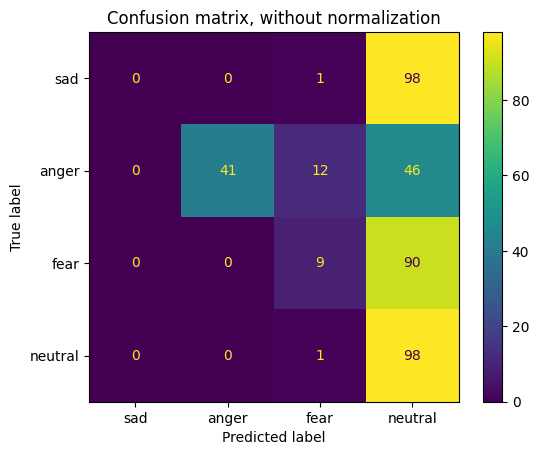

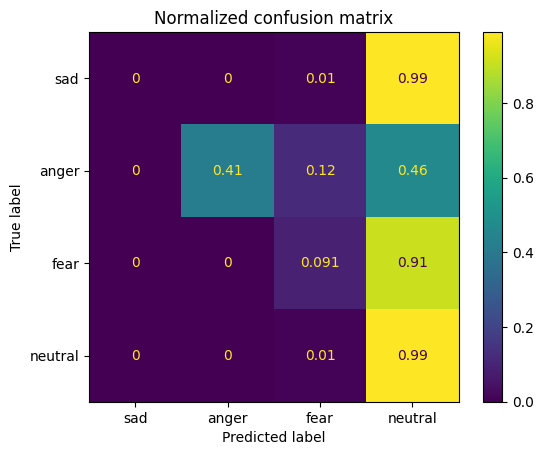

In [33]:
# Plot normalized and non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),("Normalized confusion matrix", "true")]

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        knn,
        X_test,
        y_test,
        display_labels=target_names,
        normalize=normalize,
    )
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)